# Mission 1

Affiche les 10 premières lignes du fichier ci-après : http://bit.ly/imdbratings

In [0]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv"

df = pd.read_csv(url, sep=",")

df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


# Mission 2

Trie ton dataframe en ordre croissant par rapport à la colonne star_rating

In [0]:

df1 = df.sort_values(by = 'star_rating', ascending=True)

In [0]:
df1.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
947,7.4,Eraserhead,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."


# Mission 3

Répond au questions ci-dessous :
- Quel est le start-rating médian ?
- Quel est le genre le mieux noté ?
- Quel est le pourcentage d'apparition de chaque genre de film ?

In [0]:
df1.loc[:, "star_rating"].median()

7.8

In [0]:
df_rating = df1.groupby(['genre'])

df_rating1 = df_rating['star_rating'].mean().reset_index().rename(
    columns={'genre':'Genre','star_rating' : 'Mean_Star_rating'})

df_rating1

,Genre,Mean_Star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Family,7.850000
8,Fantasy,7.700000
9,Film-Noir,8.033333


In [0]:
df_rating1.max()

Genre               Western
Mean_Star_rating    8.25556
dtype: object

In [0]:
df_per = df_rating['genre'].count().reset_index(name="count")
   
df_per

,genre,count
0,Action,136
1,Adventure,75
2,Animation,62
3,Biography,77
4,Comedy,156
5,Crime,124
6,Drama,278
7,Family,2
8,Fantasy,1
9,Film-Noir,3


In [0]:
df_per["percentage"] = df_per['count']/df_per['count'].sum()*100

df_per

,genre,count,percentage
0,Action,136,13.891726
1,Adventure,75,7.660878
2,Animation,62,6.332993
3,Biography,77,7.865169
4,Comedy,156,15.934627
5,Crime,124,12.665986
6,Drama,278,28.396323
7,Family,2,0.204290
8,Fantasy,1,0.102145
9,Film-Noir,3,0.306435


# Mission 4

Fait une visualisation avec matplotlib en rapport avec les genre de films. Il s'agira d'un camembert, celui-ci aura une légende et les pourcentages d'apparition de chaque genre.

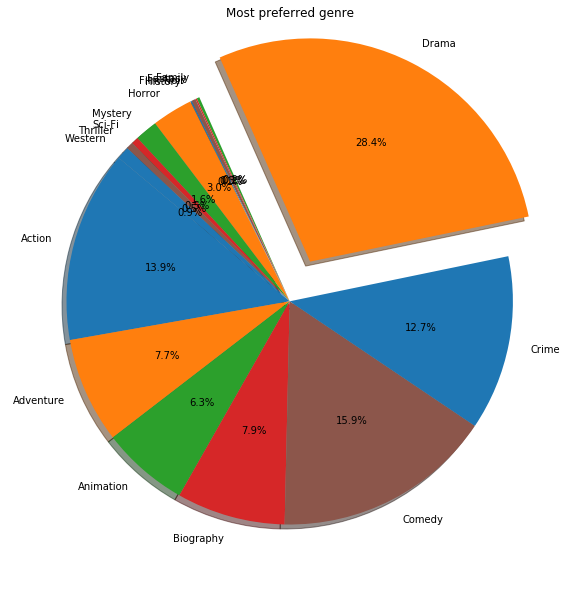

In [0]:
import matplotlib.pyplot as plt

genre_data = df_per["genre"]
count_data = df_per["count"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

plt.figure(figsize=(10,15))

plt.pie(count_data, labels=genre_data, explode = explode ,colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Most preferred genre")

plt.show()

# Mission 5

Affiche uniquement les lignes des films du type le moins bien noté en moyenne

In [0]:
df_thrill = (df1.loc[df1['genre']=="Thriller", :])
df_thrill

,star_rating,title,content_rating,genre,duration,actors_list
848,7.5,The Man Who Knew Too Much,PG,Thriller,120,"[u'James Stewart', u'Doris Day', u'Brenda de B..."
902,7.5,Frenzy,R,Thriller,116,"[u'Jon Finch', u'Barry Foster', u'Alec McCowen']"
728,7.6,La piel que habito,R,Thriller,120,"[u'Antonio Banderas', u'Elena Anaya', u'Jan Co..."
496,7.8,Misery,R,Thriller,107,"[u'James Caan', u'Kathy Bates', u'Richard Farn..."
350,8.0,Shadow of a Doubt,APPROVED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."


# Mission 6

Affiche les films qui ont une durée supérieure à 200 et dans lesquelles le genre contient la lettre h en miniscule ou majuscule

In [0]:
df_fill= (df1.loc[(df1['duration'] > 200) & (df1['genre'].str.contains("h","H")), :])

df_fill

,star_rating,title,content_rating,genre,duration,actors_list
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."
